In [1]:
import gymnasium as gym
import numpy as np
import random
from Qtabularfunctions import*
from Cartpolefamily import*
import matplotlib.pyplot as plt

In [2]:
category="unstable"

In [3]:
def debug_discretization(agent, env):
    """Check if discretization is working properly"""
    state = env.reset()
    
    print("=== Discretization Debug ===")
    print(f"Original state: {state}")
    print(f"Discretized state: {agent.disc.discretize(state)}")
    # print(f"State bounds: {agent.disc.bounds}")
    print(f"Number of bins per dimension: {agent.disc.new_bins}")
    
    # Test multiple states
    for i in range(5):
        action = env.action_space.sample()
        next_state, reward, done, _,_ = env.step(action)
        print(f"\nStep {i}:")
        print(f"  State: {state} -> Discretized: {agent.disc.discretize(state)}")
        print(f"  Next: {next_state} -> Discretized: {agent.disc.discretize(next_state)}")
        state = next_state
        if done:
            state = env.reset()

In [32]:
gen = CartPoleCategoryGenerator()
env = gen.generate_env(category)

low = np.array([-4.8, -3.0, -0.418, -3.5])
high = np.array([4.8, 3.0, 0.418, 3.5])

agent = TabularQLearningAgent(
    statespace=[low,high],
    num_actions=21,  
    lr=0.1,
    gamma=0.99,
    epsilon=0.5,
    force_mag=env.force_mag
)

Continuous action space discretized into 21 actions:
Discrete actions: [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]


In [28]:
debug_discretization(agent,env)

=== Discretization Debug ===
Original state: [ 2.031896    2.8943636   0.33494857 -0.52385604]
Discretized state: (0, 4, 4, 0)
Number of bins per dimension: 5

Step 0:
  State: [ 2.031896    2.8943636   0.33494857 -0.52385604] -> Discretized: (0, 4, 4, 0)
  Next: [ 0.02420726 -0.05510107  0.0347472   0.08523793] -> Discretized: (0, 2, 3, 3)

Step 1:
  State: [ 0.02420726 -0.05510107  0.0347472   0.08523793] -> Discretized: (0, 2, 3, 3)
  Next: [ 0.02310524  0.11058009  0.03645205 -0.09058464] -> Discretized: (0, 3, 3, 1)

Step 2:
  State: [ 0.02310524  0.11058009  0.03645205 -0.09058464] -> Discretized: (0, 3, 3, 1)
  Next: [ 0.02531684  0.18935907  0.03464031 -0.16849075] -> Discretized: (0, 3, 3, 1)

Step 3:
  State: [ 0.02531684  0.18935907  0.03464031 -0.16849075] -> Discretized: (0, 3, 3, 1)
  Next: [ 0.02910402  0.3746463   0.0312705  -0.3663246 ] -> Discretized: (0, 4, 3, 1)

Step 4:
  State: [ 0.02910402  0.3746463   0.0312705  -0.3663246 ] -> Discretized: (0, 4, 3, 1)
  Next: 

Episode 0 stopped early due to small TD error

--- Q-update Debug ---
State: (0, 1, 2, 3), Action: 13, Next State: (0, 2, 2, 2)
Current Q: 99.993
Target: 99.993
TD Error: 0.000
Update amount: 0.000
New Q: 99.993
Max Q in next state: 99.993

--- Q-update Debug ---
State: (0, 3, 2, 1), Action: 10, Next State: (0, 3, 2, 1)
Current Q: 99.990
Target: 99.991
TD Error: 0.000
Update amount: 0.000
New Q: 99.990
Max Q in next state: 99.990

--- Q-update Debug ---
State: (0, 3, 2, 1), Action: 10, Next State: (0, 3, 2, 1)
Current Q: 99.992
Target: 99.992
TD Error: 0.000
Update amount: 0.000
New Q: 99.992
Max Q in next state: 99.992

--- Q-update Debug ---
State: (0, 1, 1, 3), Action: 10, Next State: (0, 1, 1, 3)
Current Q: 99.989
Target: 99.989
TD Error: 0.000
Update amount: 0.000
New Q: 99.989
Max Q in next state: 99.989



--- Q-update Debug ---
State: (0, 3, 3, 1), Action: 4, Next State: (0, 2, 2, 2)
Current Q: 99.991
Target: 99.992
TD Error: 0.001
Update amount: 0.000
New Q: 99.991
Max Q in next state: 99.992

--- Q-update Debug ---
State: (0, 2, 3, 2), Action: 13, Next State: (0, 2, 3, 2)
Current Q: 99.992
Target: 99.992
TD Error: 0.000
Update amount: 0.000
New Q: 99.992
Max Q in next state: 99.992

--- Q-update Debug ---
State: (0, 3, 2, 1), Action: 10, Next State: (0, 3, 1, 1)
Current Q: 99.991
Target: 99.991
TD Error: -0.000
Update amount: -0.000
New Q: 99.991
Max Q in next state: 99.991

--- Q-update Debug ---
State: (0, 2, 2, 2), Action: 6, Next State: (0, 1, 2, 3)
Current Q: 99.992
Target: 99.992
TD Error: 0.000
Update amount: 0.000
New Q: 99.992
Max Q in next state: 99.992

--- Q-update Debug ---
State: (0, 2, 3, 2), Action: 13, Next State: (0, 3, 3, 2)
Current Q: 99.992
Target: 99.992
TD Error: 0.000
Update amount: 0.000
New Q: 99.992
Max Q in next state: 99.992

--- Q-update Debug ---
State:

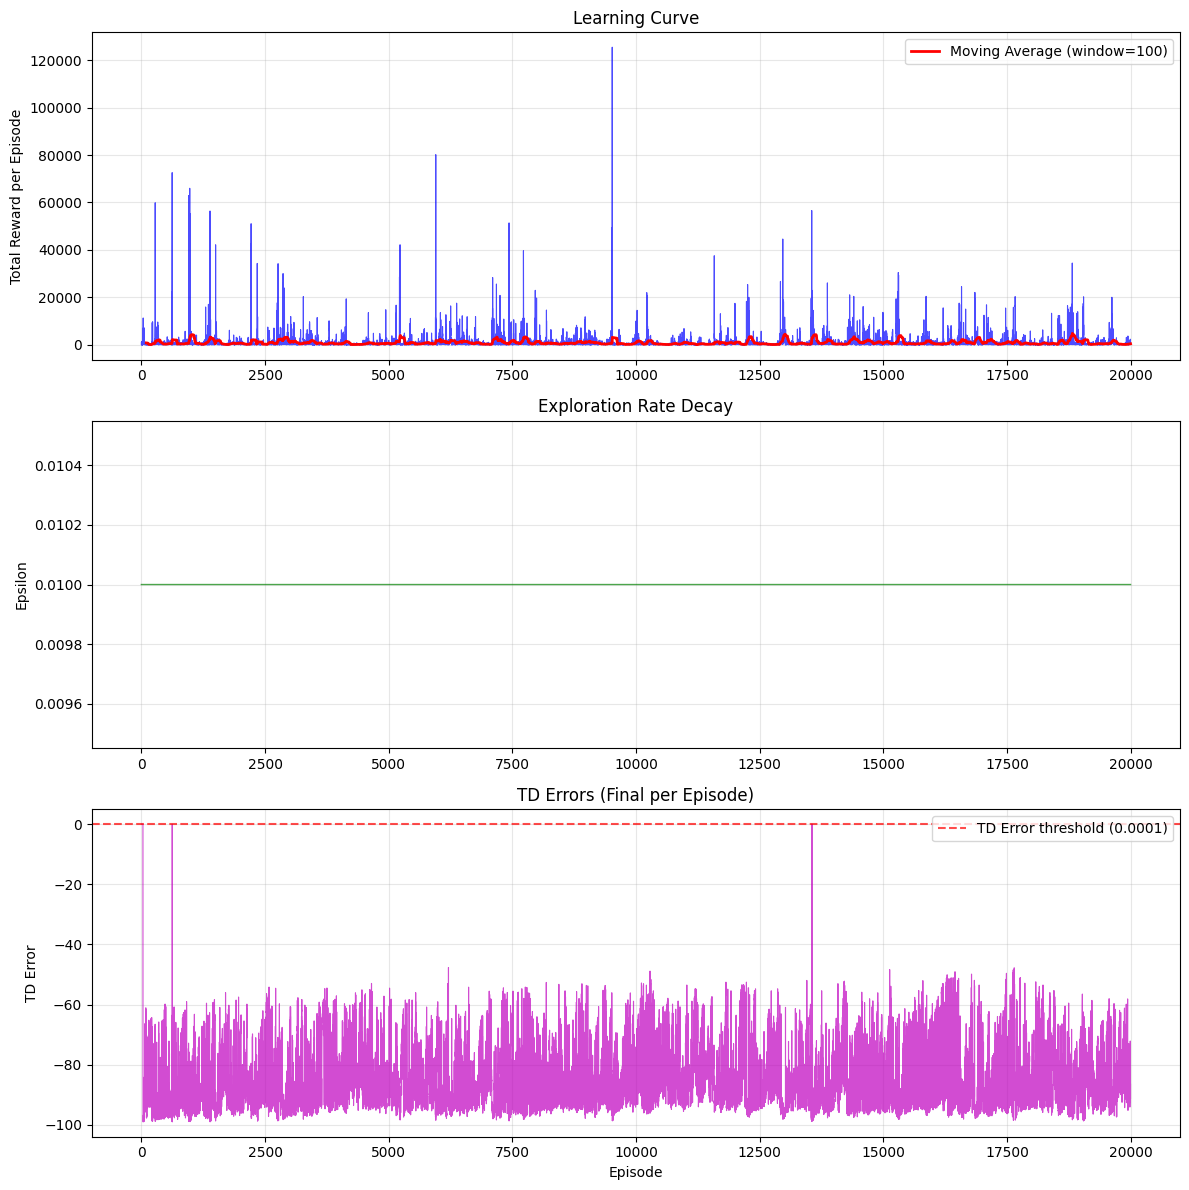

In [30]:
# Initialize lists to store data for plotting
episode_numbers = []
total_rewards = []
epsilons = []
td_errors = []  # Track TD errors

episodes = 20000
min_td_error = 1e-4  # Minimum TD error threshold to continue episode
consecutive_small_errors = 10  # Number of consecutive small TD errors to trigger stop

for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False
    small_error_count = 0
    
    while not done:
        # Choose action (returns index 0-9)
        a = agent.choose_action(state)
        action = agent.discrete_actions[a]
        
        # Take action in environment
        result = env.step(action)
        if len(result) == 4:
            next_state, reward, done, info = result
        else:
            next_state, reward, done, truncated, info = result
            done = done or truncated
        
        # Update Q-table and get TD error
        td_error = agent.update(state, a, reward, next_state, done)
        
        state = next_state
        total_reward += reward
        
        # Check if TD error is small enough to stop episode
        if abs(td_error) < min_td_error:
            small_error_count += 1
        else:
            small_error_count = 0
            
        # Stop episode if TD error has been small for consecutive steps
        if small_error_count >= consecutive_small_errors:
            done = True
            if episode % 1000 == 0:  # Print only occasionally
                print(f"Episode {episode} stopped early due to small TD error")
    
    # Decrease exploration over time
    if episode % 100 == 0:
        agent.decrease_epsilon()
    
    # Store data for plotting
    episode_numbers.append(episode)
    total_rewards.append(total_reward)
    epsilons.append(agent.epsilon)
    td_errors.append(td_error)  # Store final TD error

env.close()

# Create the final plot with TD error tracking
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))

# Plot 1: Learning curve (total rewards)
ax1.plot(episode_numbers, total_rewards, 'b-', alpha=0.7, linewidth=0.8)
ax1.set_title('Learning Curve')
ax1.set_ylabel('Total Reward per Episode')
ax1.grid(True, alpha=0.3)

# Optional: Add a moving average to see the trend more clearly
window_size = 100
if len(total_rewards) > window_size:
    moving_avg = np.convolve(total_rewards, np.ones(window_size)/window_size, mode='valid')
    ax1.plot(episode_numbers[window_size-1:], moving_avg, 'r-', linewidth=2, label=f'Moving Average (window={window_size})')
    ax1.legend()

# Plot 2: Epsilon decay
ax2.plot(episode_numbers, epsilons, 'g-', alpha=0.7, linewidth=1)
ax2.set_title('Exploration Rate Decay')
ax2.set_ylabel('Epsilon')
ax2.grid(True, alpha=0.3)

# Plot 3: TD errors
ax3.plot(episode_numbers, td_errors, 'm-', alpha=0.7, linewidth=0.8)
ax3.set_title('TD Errors (Final per Episode)')
ax3.set_xlabel('Episode')
ax3.set_ylabel('TD Error')
ax3.grid(True, alpha=0.3)
ax3.axhline(y=min_td_error, color='r', linestyle='--', alpha=0.7, label=f'TD Error threshold ({min_td_error})')
ax3.legend()

plt.tight_layout()
plt.show()

In [31]:
# Get different policy representations
print("1. Basic policy (state -> action index):")
basic_policy = agent.get_policy_dict()
print(f"Sample: {list(basic_policy.items())[:2]}")

print("\n2. Detailed policy:")
detailed_policy = agent.get_detailed_policy()
sample_state = list(detailed_policy.keys())[0]
print(f"Sample for state {sample_state}: {detailed_policy[sample_state]}")

# Print a nice sample
agent.print_policy_sample(num_samples=50)

1. Basic policy (state -> action index):
Sample: [((0, 0, 0, 0), np.int64(18)), ((0, 0, 0, 1), np.int64(3))]

2. Detailed policy:
Sample for state (0, 0, 0, 0): {'action_index': np.int64(18), 'continuous_action': np.float64(8.0), 'q_value': np.float64(69.31271295321064), 'all_q_values': [56.50439451636504, 53.65791863594019, 53.69648306174619, 54.33205530507695, 53.56792741530536, 55.90916150748396, 53.869327561355405, 55.902825911483575, 53.64015000181057, 56.30337899015399, 53.6874279445522, 52.552838597431915, 53.387018494179024, 55.41943740734805, 51.18558533889649, 53.30493938898805, 53.816358561419705, 53.21808204581886, 69.31271295321064, 51.20062753983762, 56.180725636151806]}

Policy Sample (first 50 states):
State (0, 0, 0, 0) -> Action: 8.000
State (0, 0, 0, 1) -> Action: -7.000
State (0, 0, 0, 2) -> Action: -4.000
State (0, 0, 0, 3) -> Action: -7.000
State (0, 0, 0, 4) -> Action: 5.000
State (0, 0, 1, 0) -> Action: -10.000
State (0, 0, 1, 1) -> Action: -9.000
State (0, 0, 1